In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, \
precision_recall_curve, auc
import os 
import sys

In [2]:
curent_dir = os.getcwd()
parent_dir = os.path.dirname(curent_dir)
sys.path.append(parent_dir)

In [3]:
from fundamentas.stepbystep_v0 import StepByStep

In [4]:
import numpy as np


def gen_img(start, target, fill=1, img_size=10):
    # Generates empty image
    img = np.zeros((img_size, img_size), dtype=float)

    start_row, start_col = None, None

    if start > 0:
        start_row = start
    else:
        start_col = np.abs(start)

    if target == 0:
        if start_row is None:
            img[:, start_col] = fill
        else:
            img[start_row, :] = fill
    else:
        if start_col == 0:
            start_col = 1
        
        if target == 1:
            if start_row is not None:
                up = (range(start_row, -1, -1), 
                      range(0, start_row + 1))
            else:
                up = (range(img_size - 1, start_col - 1, -1), 
                      range(start_col, img_size))
            img[up] = fill
        else:
            if start_row is not None:
                down = (range(start_row, img_size, 1), 
                        range(0, img_size - start_row))
            else:
                down = (range(0, img_size - 1 - start_col + 1), 
                        range(start_col, img_size))
            img[down] = fill
    
    return 255 * img.reshape(1, img_size, img_size)


def generate_dataset(img_size=10, n_images=100, binary=True, seed=17):
    np.random.seed(seed)

    starts = np.random.randint(-(img_size - 1), img_size, size=(n_images,))
    targets = np.random.randint(0, 3, size=(n_images,))
    
    images = np.array([gen_img(s, t, img_size=img_size) 
                       for s, t in zip(starts, targets)], dtype=np.uint8)
    
    if binary:
        targets = (targets > 0).astype(int)
    
    return images, targets

In [5]:
import matplotlib.pyplot as plt

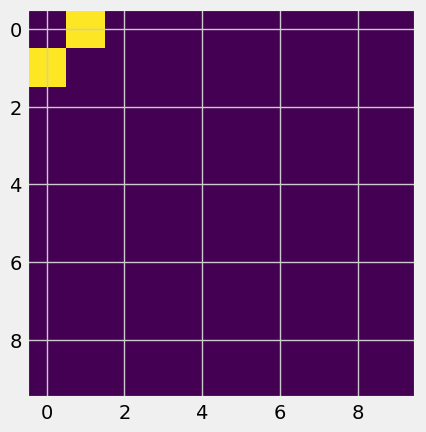

In [6]:
images , lables = generate_dataset(img_size= 10  , 
                                   n_images= 300 , binary= True ,  seed = 13)
plt.imshow(images[2].squeeze())

In [7]:
example = images[7]

In [8]:
example.shape 

(1, 10, 10)

In [9]:
# pli images need hwc thus converting into hwc 
example_hwc = np.transpose(example , (1 ,2 ,0))
example_hwc.shape

(10, 10, 1)

In [10]:
example_hwc

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]

Tranformation 

There are usally two transformation  ,   
1) transformation based on image 
2) transformation based on tensor 

## and ovisially there are conversiontranformation to convert tensor TOPLIImage() and frm PLI iamge to TOTensor()

In [11]:
from PIL import Image 

d:\software\miniconda\envs\mlenv\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


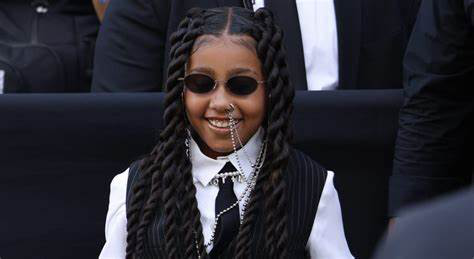

In [12]:
import torchvision.transforms as transforms
temsorizer = transforms.ToTensor()
image  = Image.open("img.jpg")
image

In [13]:
tensorizer =  transforms.ToTensor()
tensorizer(image)

tensor([[[0.0353, 0.0353, 0.0353,  ..., 0.1725, 0.1451, 0.1451],
         [0.0471, 0.0471, 0.0471,  ..., 0.1529, 0.1529, 0.1529],
         [0.0627, 0.0627, 0.0588,  ..., 0.1176, 0.1059, 0.1059],
         ...,
         [0.1294, 0.0627, 0.0745,  ..., 0.2078, 0.1569, 0.2275],
         [0.1882, 0.0980, 0.0824,  ..., 0.2078, 0.2275, 0.2980],
         [0.2588, 0.1373, 0.0824,  ..., 0.2078, 0.2510, 0.3176]],

        [[0.0392, 0.0392, 0.0392,  ..., 0.1686, 0.1412, 0.1412],
         [0.0510, 0.0510, 0.0510,  ..., 0.1490, 0.1490, 0.1490],
         [0.0667, 0.0667, 0.0627,  ..., 0.1137, 0.1020, 0.1020],
         ...,
         [0.1294, 0.0627, 0.0745,  ..., 0.2196, 0.1686, 0.2392],
         [0.1882, 0.0980, 0.0824,  ..., 0.2196, 0.2392, 0.3098],
         [0.2588, 0.1373, 0.0824,  ..., 0.2196, 0.2627, 0.3294]],

        [[0.0549, 0.0549, 0.0549,  ..., 0.2392, 0.2118, 0.2118],
         [0.0667, 0.0667, 0.0667,  ..., 0.2118, 0.2118, 0.2118],
         [0.0824, 0.0824, 0.0784,  ..., 0.1686, 0.1569, 0.

In [14]:
example_hwc.shape

(10, 10, 1)

In [15]:
example_tensor = temsorizer(example_hwc)
example_tensor.shape

torch.Size([1, 10, 10])

## if you are doing projects in object detection  , you should not do anything that chages its position , flipping or shifting  . adding noise would still be fine thoug  , 

but for normal image prections type , data agumetation is good  ,
for Let’s say we have an image of a dog. If we rotate it, it is still a dog, but from a
different angle. Instead of taking two pictures of the dog, one from each angle, we
take the picture we already have and use data augmentation to simulate many
different angles. Not quite the same as the real deal, but close enough to improve
our model’s performance. 

data augmentation is a clever technique to expand a
dataset (augment it) without collecting more data. In general, deep learning
models are very data-hungry, requiring a massive number of examples to perform
well. But collecting large datasets is often challenging, and sometimes impossible.

### fliping , rotating the images 

In [16]:
example_img = transforms.ToPILImage()(example_tensor)


In [17]:
convert_to_PILImage = transforms.ToPILImage()
example_img = convert_to_PILImage(example_tensor)
type(example_img)

PIL.Image.Image

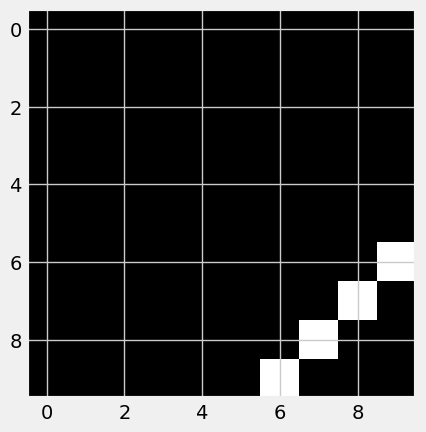

In [18]:
plt.imshow(example_img , cmap = 'gray')
plt.grid( 'false')

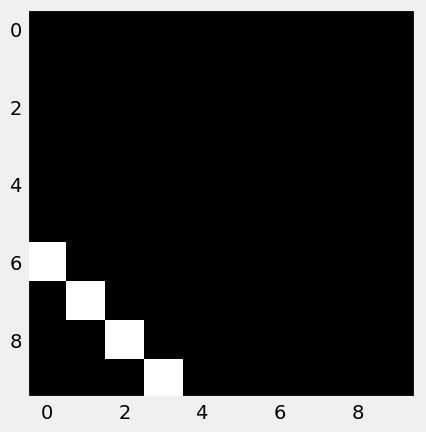

In [19]:
flipper = transforms.RandomHorizontalFlip(p = 1.0) # 100 times randomly flip the image
flipped_img = flipper(example_img)
plt.imshow(flipped_img,cmap = 'grey')
plt.grid(False)

In [20]:
### there are only four transformation that takes  non-image as imputs 
### LinearTransormation() 
### Normalize()
### RandomErasing()
### ConvertImageDtype()


In [21]:
img_tensor = tensorizer(flipped_img)
img_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]])

## normalize transform 

In [22]:
## nomalize is  1-mean / std
## so say our ranges rangees between [0,1] then we are calcuating nomalize value for this
## 0 - 0.5 / 0.5 = -1
## 1 - o.5 / 0.5  = 1 
## thus our range will be [-1 , 1] for [0,1] range

In [23]:
normalizer = transforms.Normalize(mean= .5 , std = (.5))
normalizer(img_tensor)

tensor([[[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.]]])

In [24]:
img_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]])

## Composing Image 

In [25]:
## compose compose several transformation in single  , big compose composed transformation 

In [26]:
composer = transforms.Compose([transforms.RandomHorizontalFlip(p = 1.0) , 
                               transforms.Normalize(mean = (.5) , std = (.5))])

In [27]:
composed_tensor = composer(example_tensor)
composed_tensor

tensor([[[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
         [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.]]])

In [28]:
example

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
        [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0],
        [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0],
        [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0]]], dtype=uint8)

In [29]:
example_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]])

### data preparation 

In [30]:
x_tensor = torch.as_tensor(images / 255).float()
y_tensor = torch.as_tensor(lables.reshape(-1,1)).float()

In [31]:
x_tensor.shape , y_tensor.shape

(torch.Size([300, 1, 10, 10]), torch.Size([300, 1]))

In [32]:
from torch.utils.data import Dataset 
class TransformTensor(Dataset):
    def __init__(self  , x ,y , transform = None ):
        self.x = x 
        self.y = y 
        self.transform = transform 

    def __get__item(self ,  index):
        if self.transform :
            x = self.transform(self.x[index])
        
        return self.x[index]
    
    def __len__(self ):
        return len(self.x)   

     

In [33]:
composer = transforms.Compose([transforms.RandomHorizontalFlip(p= 1.) , 
                              transforms.Normalize(mean = (.5) , std = (.5))])

dataset = TransformTensor(x_tensor , y_tensor , composer)

In [34]:
a = [32] 
tuple(np.random.randint((255 ,255 , 255)))

(192, 205, 36)

# index splitter

In [35]:
splits_tensor = torch.arange(10)
multiplyer = 10 / splits_tensor.sum()
weighted_tensor = (splits_tensor * multiplyer).long()
weighted_tensor.sum()

tensor(6)

In [36]:
10 - weighted_tensor.sum()

tensor(4)

In [50]:
import torch.utils.data as data_utils

def index_splitter(n , splits , seed = 13):
    idx  = torch.arange(n) #say n was 5 

    splits_tensor = torch.as_tensor(splits) ##say our splits input was [4 ,5 ,1 ] which splits are greater then number of values

    #Now we multiply  5 / (4+5+1) = 5/10=0.5

    multiplyer = n / splits_tensor.sum() 

    #now we scale the splits 

    scale_splits =  (multiplyer * splits_tensor).long()
    ## 4 * 0.5  , 5 * 0.5 , 1 * 0.5 =  2 , 2.5 , 0.5  
    ## since we have long , it discards the decimal part and keeps only integer parts
    #so , [2 ,2,0]

    #also 2 + 2+ 0 = 4 . but we have 5 number of dataset and one elemts might not be included in some chunk splits 


    #tacking with rounds 
    diff = n - scale_splits.sum()
    ### 5 - 4 = 1 
    ## now we add one to any of the  , scale splits  2 , 2, 0  
    # adding in first index just for fun 

    scale_splits[0] = scale_splits[0] + diff 



    ## now we use pytorch random splits to splits the indices 
    torch.manual_seed(seed)
    return data_utils.random_split(idx , scale_splits)

In [51]:
train_idx , val_idx = index_splitter(len(x_tensor), [80, 20])
train_idx , val_idx 


(<torch.utils.data.dataset.Subset at 0x1fb529056d0>,
 <torch.utils.data.dataset.Subset at 0x1fb51767250>)

In [52]:
def index_splitter(n , splits , seed = 13):
    idx = torch.arange(n)
    #makes splits argument as tensor 
    splits_tensor  = torch.as_tensor(splits)
    multiplyer = n / splits_tensor.sum()
    weighted_tensor = (splits_tensor * multiplyer).long()
    diff = n - splits_tensor.sum()


    

In [55]:
import torch.utils.data as data_utils
sampler = data_utils.SubsetRandomSampler(train_idx)
sampler

In [57]:
train_sampler =data_utils.SubsetRandomSampler(train_idx)
val_sampler = data_utils.SubsetRandomSampler(val_idx)

train_sampler , val_sampler

(<torch.utils.data.sampler.SubsetRandomSampler at 0x1fb517cf1d0>,
 <torch.utils.data.sampler.SubsetRandomSampler at 0x1fb52d6f3d0>)

In [59]:
train_sampler , val_sampler 

(<torch.utils.data.sampler.SubsetRandomSampler at 0x1fb517cf1d0>,
 <torch.utils.data.sampler.SubsetRandomSampler at 0x1fb52d6f3d0>)

In [60]:
## we stil need to load the dataset 
train_loader  = DataLoader(
    dataset  = dataset  ,
    batch_size = 16 , sampler = train_sampler
)

#val loader 
val_loader = DataLoader(
    dataset = dataset , 
    batch_size = 16 , 
    sampler = val_sampler  
)

In [61]:
#check if the loader are returning the correct number of the batches 
len(iter(val_loader))

4

## doing same like train test split 

In [62]:
#data loader 
class  TransformTensorDataset(Dataset):
    def __init__(self , x , y  , transforms = None ):
        self.x = x 
        self.y = y 
        self.transforms = transforms 

    def __getitem__(self, item ):
        x  = self.data
        if transforms:
            x =  self.transforms(self.x[item])
        return
        
    def __len__(self):
        return len(self.x)

In [68]:
class TransformTensorDataset(Dataset):
    def __init__(self, x ,y , transforms = None ):
        self.x = x 
        self.y = y 
        self.transforms = transforms 
    
    def __getitem__(self , index):
        x = self.x[index]
        y = self.y[index]
        if self.transforms:
            x  = self.transforms(x)

        return x , y 
    
    def __len__(self):
        return len(self.x)

In [69]:
x_train_tensor  =  x_tensor[train_idx]
x_val_tensor   = x_tensor[val_idx] 

y_train_tensor  = y_tensor[train_idx]
y_val_tesnor = x_tensor[val_idx]
 
### now add compose  , in train dataset and val dataset 
train_composer = transforms.Compose([
    transforms.RandomHorizontalFlip(p = .5) , 
    transforms.Normalize(mean = (.5) , std = (.5))

])

val_composer = transforms.Compose(
    transforms.Normalize(mean = (.5) , std = (.5))
)


# dataset creater 
train_dataset = TransformTensorDataset(x_train_tensor , y_train_tensor , transforms = train_composer) 
val_dataset = TransformTensorDataset(x_val_tensor , y_val_tesnor , transforms = val_composer)

## weighted Random Sampler 

In [70]:
### tacking imblance dataset  , by using weight sampler 
### that is , that class with fewer (minority class) will get larger weights and vice versa  and on average we will end up with mini batch 
## roughly the same numbers of data points in each class .

First we have to find how imblance dataset is , i,e how many datapoints belongs to each label 
we use pytorch unique() method on our tranning set labels (y_train tensor ) with returns counts to to , 

In [74]:
classes , counts = y_train_tensor.unique(return_counts = True )
print(classes, counts)

tensor([0., 1.]) tensor([ 76, 164])


there are  76 0(NOT DIAGONAL) and 164 ones(DIAGONAL) , clearly IMBALACDED DATASETS 


In [79]:
# CLCULATE THE WEIGHTS BY INVERTING THE COUNTS 
weights = 1 / counts.float()
weights

tensor([0.0132, 0.0061])

In [80]:
# sum up 
0.0132 +  0.0061 

0.0193

These weights does't sum up to 1  , and its not necessary by pytorch weight sampler to be 1 also 

In [92]:
sample_weights = weights[y_train_tensor.squeeze().long()]
print(sample_weights.shape)
print(sample_weights[:10])
print(y_train_tensor[:10].squeeze())

torch.Size([240])
tensor([0.0061, 0.0061, 0.0132, 0.0061, 0.0132, 0.0061, 0.0061, 0.0132, 0.0061,
        0.0061])
tensor([1., 1., 0., 1., 0., 1., 1., 0., 1., 1.])


## Weight random Sampler 

In [ ]:
generator = 

In [49]:
splits_tensor = ((10 / torch.arange(10).sum()) * torch.arange(10)).long()

In [46]:
splits_tensor = torch.arange(10)

In [47]:
splits_tensor = torch.arange(10)

In [48]:
splits_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
splits_tensor = torch.as_tensor(splits_tensor)

In [51]:
multiplyer  = 10 / (splits_tensor.sum())
multiplyer 

tensor(0.2222)

In [52]:
splits_tensor_weighted = ( multiplyer * splits_tensor).long()
splits_tensor_weighted

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 2])

In [53]:
splits_tensor_weighted.sum()

tensor(6)

In [54]:
splits_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
splits_tensor_weighted

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 2])

In [56]:
10 - splits_tensor.sum()

tensor(-35)

In [57]:
splits_tensor[0] + -35

tensor(-35)

In [205]:

def index_splitter(n , splits , seed = 13):
    idx =torch.arange(n)
    splits_tensor = torch.as_tensor(idx)
    scaled = splits_tensor/(stpl)

In [145]:
%%writefile generate_synthetic_images.py
from PIL import Image 
import os 

save_dir = 'data/synthetic_images'
#create 
os.makedirs(save_dir , exist_ok= True)
#generate and save synthetic image
for i in range(100): #generate 100 images
    #create a new image for simplecity using solid color 
    random_color = tuple(np.random.randint([256 , 256 ,256]))
    image = Image.new('RGB'  , size = (256 ,256) , color = random_color)

    #save the image 
    image.save(os.path.join(save_dir , f'image_{i}.jpg'))


Writing generate_synthetic_images.py


In [105]:
## Subset Random Sampler
import numpy as np 
import torch
from torch.utils.data import Dataset , DataLoader , SubsetRandomSampler 
from torchvision import datasets , transforms 
#define tranformations 

train_transforms = transforms.Compose([
    transforms.ToTensor() , 
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

#load  dataset 
try :
    dataset = datasets.ImageFolder(

In [168]:
dataset = datasets.ImageFolder('d:\\ujjwal\\Deep-learning\\computer_vision\\data\\images')


FileNotFoundError: Couldn't find any class folder in d:\ujjwal\Deep-learning\computer_vision\data\images.

In [166]:
datasets.ImageFolder('data/images')

FileNotFoundError: Couldn't find any class folder in data/images.

In [162]:

image = Image.open('data/images/image_1.jpg')

In [156]:
transforms.ToTensor()('data/images/img_1.jpg')

TypeError: pic should be PIL Image or ndarray. Got <class 'str'>

In [153]:
datasets.ImageFolder('data/images/')

FileNotFoundError: Couldn't find any class folder in data/images/.

In [152]:
datasets.ImageFolder('data/synthetic_images')

FileNotFoundError: Couldn't find any class folder in data/synthetic_images.

In [92]:
lables.reshape(-1, 1 )

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [24]:
class TransformTensorDataset(Dataset):
    def __init__(self , x , y , transform = None):
        self.x = x 
        self.y = y 
        self.transform = transform 
    def __getitem__(self , index):
        x =  self.x[index]
        if self.transform :
            x = self.transform(x)
            
        return x  , self.y[index]
    
    
    
    def __getlen__(self):
        return len(self.x)
    
    

NameError: name 'Dataset' is not defined

In [21]:
example = images[7]

In [22]:
example.shape

(1, 10, 10)

In [ ]:
examplee_hcw =np.transpose(1 , 2 , 0 )